In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
#from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split,cross_val_score
sns.set()

In [10]:
#! if [ ! -e avocado.csv ]; then wget https://raw.githubusercontent.com/RanSui11/dmproject/master/avocado.csv; fi;
dat = pd.read_csv("https://raw.githubusercontent.com/RanSui11/dmproject/master/avocado.csv" )
dat.head()
#4046, 4225, 4770 indicates the label of avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
dat = dat.drop(columns = ["Unnamed: 0","year"]) # year is repeated in date

dat['Year'], dat['Month'],  dat['Day'] = dat['Date'].str.split('-').str

dat.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


# Visualization

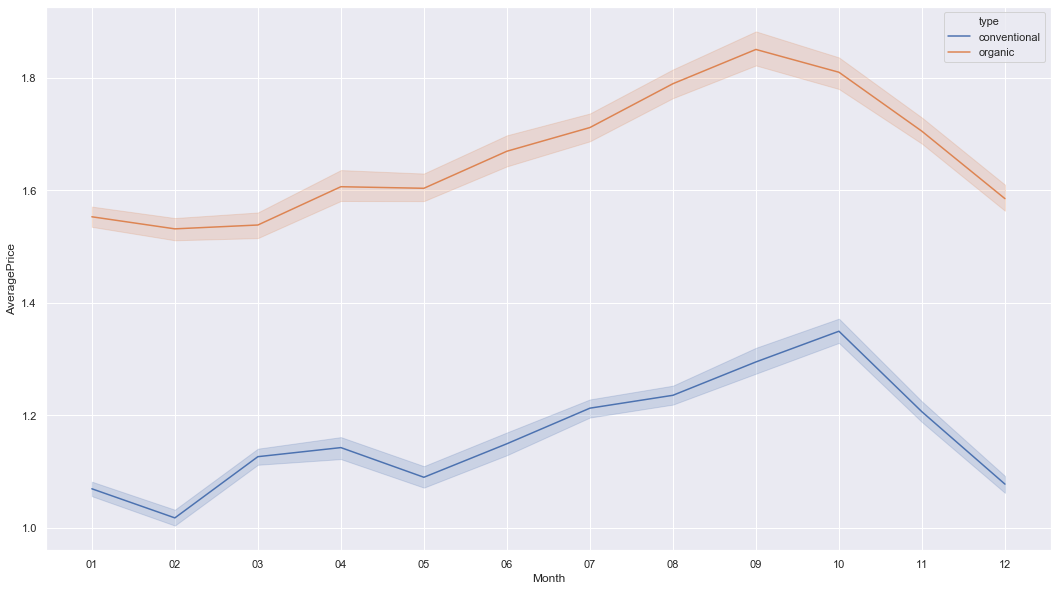

In [13]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=dat)
plt.show()

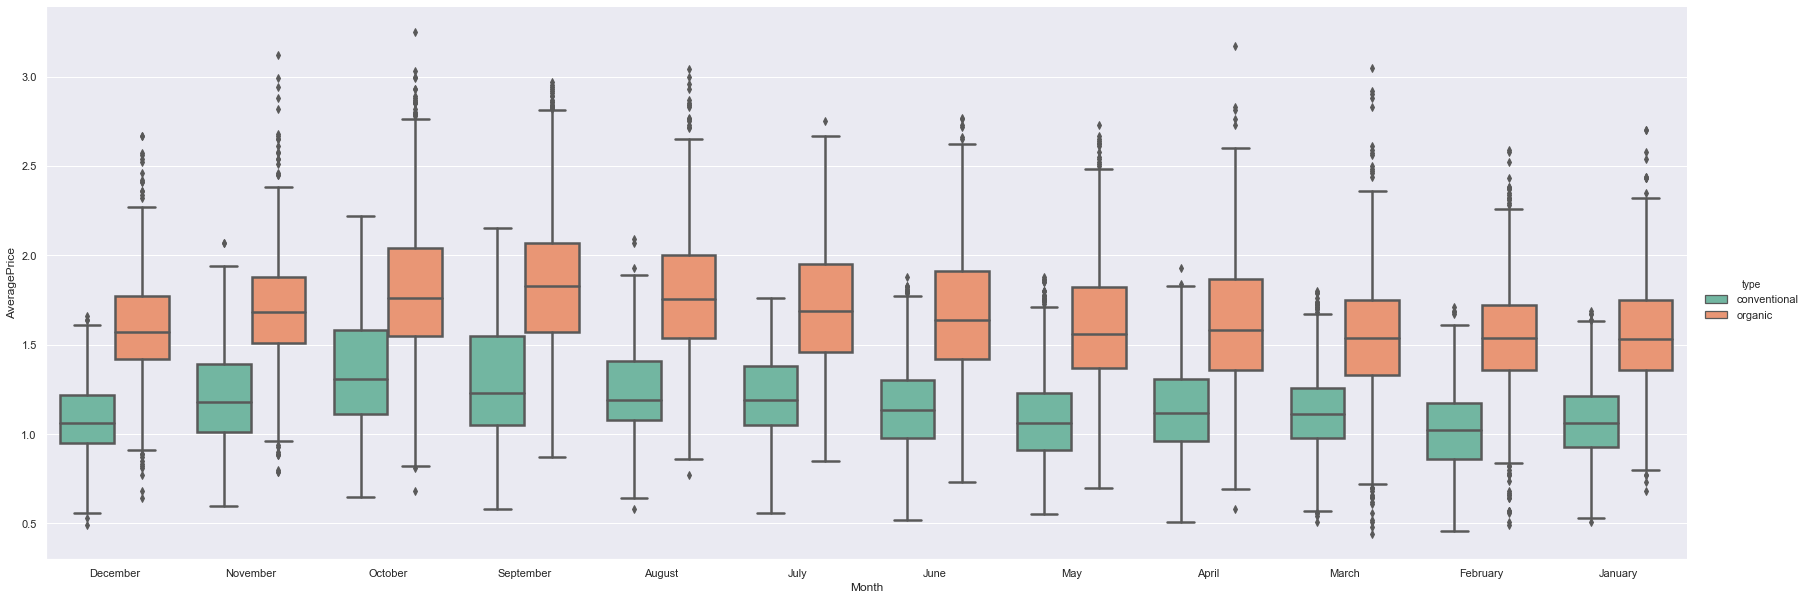

In [14]:
dat['Month'] = dat['Month'].replace({'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', 
                                   '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', 
                                   '11': 'November', '12': 'December'})


sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=dat, height=8.5, linewidth=2.5, aspect=2.8,palette="Set2");

Text(0, 0.5, 'Average Price')

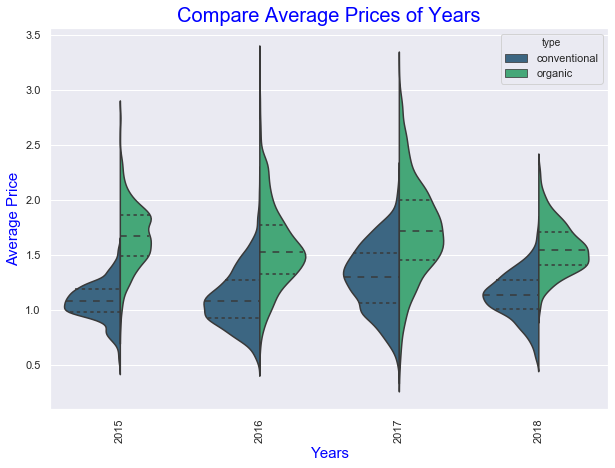

In [15]:
f,ax = plt.subplots(figsize = (10,7))
sns.violinplot(x="Year", y="AveragePrice", hue="type", data=dat,split=True, inner="quart",palette="viridis")
plt.xticks(rotation=90)
plt.title("Compare Average Prices of Years",fontsize = 20,color='blue')
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

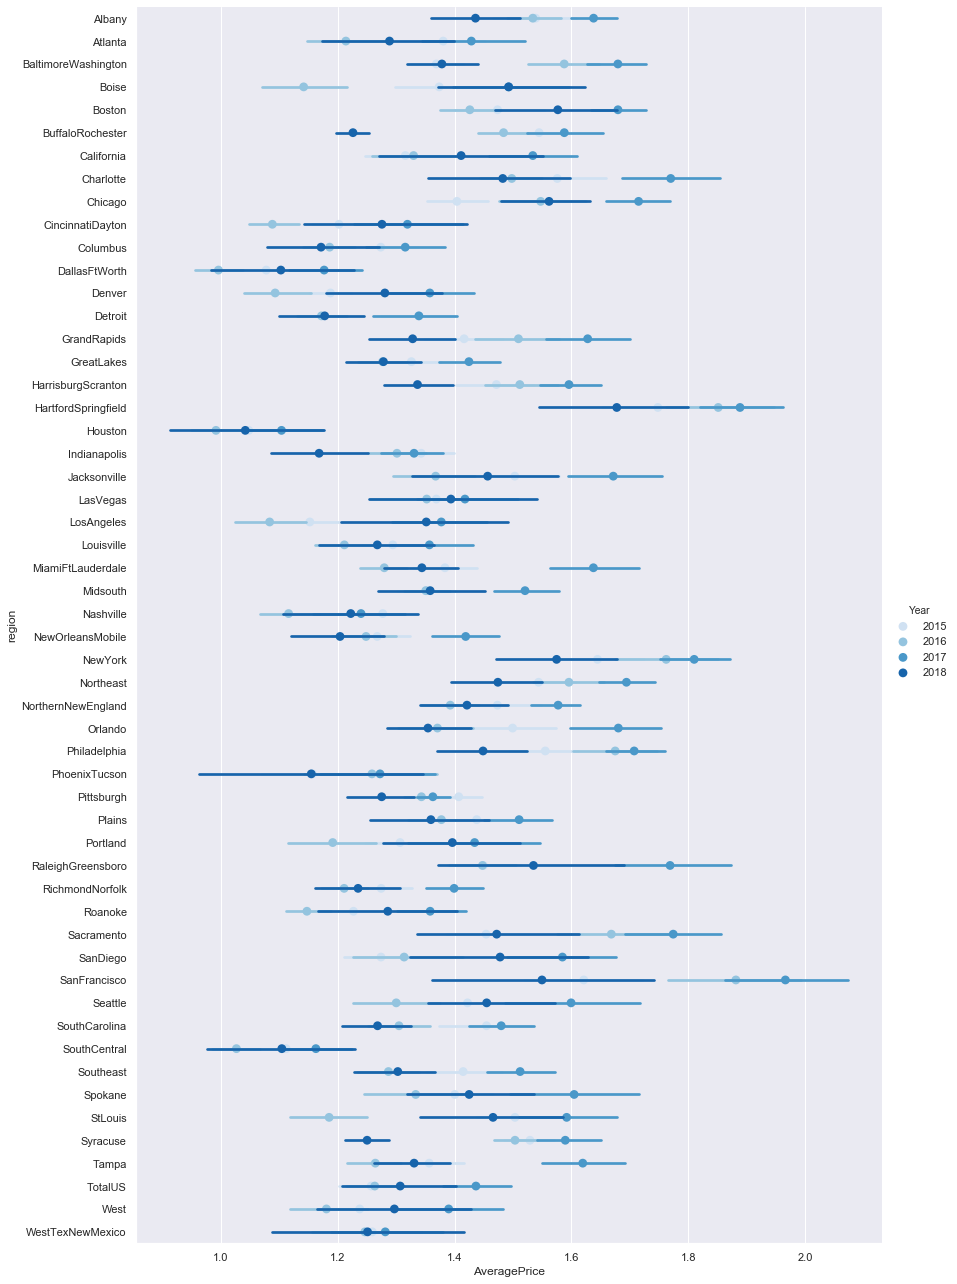

In [16]:
plt.figure(figsize=(10,10))
sns.factorplot('AveragePrice','region',data=dat,
                   hue='Year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )


In [17]:
dat = dat.drop(columns = ["Date","Year","Day"])
dat.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,December
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,December
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,December
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,December
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,November


In [19]:
dfnew2 = pd.get_dummies(dat, columns = ["type", "region", "Month"])
dfnew2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,...,1,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,...,1,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,...,1,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,...,1,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,...,0,0,0,0,0,0,0,1,0,0


In [21]:
print(dfnew2.shape) #77variables

(18249, 77)


In [22]:
#check for missing values
#if true, fill missing w/ col means
dfnew2.isnull().sum().sort_values(ascending = False) #isna().sum()

Month_September              0
region_HarrisburgScranton    0
region_CincinnatiDayton      0
region_Columbus              0
region_DallasFtWorth         0
                            ..
region_Sacramento            0
region_SanDiego              0
region_SanFrancisco          0
region_Seattle               0
AveragePrice                 0
Length: 77, dtype: int64

In [23]:
X = dfnew2.drop(columns = ["AveragePrice"])
y = dfnew2["AveragePrice"]
print(X.shape)
print(y.shape)

(18249, 76)
(18249,)


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 76 columns):
Total Volume                  18249 non-null float64
4046                          18249 non-null float64
4225                          18249 non-null float64
4770                          18249 non-null float64
Total Bags                    18249 non-null float64
Small Bags                    18249 non-null float64
Large Bags                    18249 non-null float64
XLarge Bags                   18249 non-null float64
type_conventional             18249 non-null uint8
type_organic                  18249 non-null uint8
region_Albany                 18249 non-null uint8
region_Atlanta                18249 non-null uint8
region_BaltimoreWashington    18249 non-null uint8
region_Boise                  18249 non-null uint8
region_Boston                 18249 non-null uint8
region_BuffaloRochester       18249 non-null uint8
region_California             18249 non-null uint8
region_C

In [26]:
#SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)


(13686, 76)
(4563, 76)


In [28]:
models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),MLPRegressor(alpha=20),DecisionTreeRegressor(),ExtraTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','RandomForest','AdaBoost','GradientBoost','Bagging']

In [29]:
from sklearn.metrics import r2_score

for name,model in zip(models_str,models):
    #print('Model: '+name)
    model=model   #building models
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)  
    score=r2_score(y_test,y_pred)
    print(name +' r2_score:'+str(score))

LinearRegression r2_score:0.601473317781981
KNNRegressor r2_score:0.6367106495891834


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR r2_score:-1.3964393805743214e-06
Ridge r2_score:0.6014743119802581


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.67485e-18): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.74894044884968, tolerance: 0.22226250447537632
  positive)


Lasso r2_score:0.04264497607276596
MLPRegressor r2_score:-3630859.5952809355
DecisionTree r2_score:0.6806235548336231
ExtraTree r2_score:0.7159368208447652


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest r2_score:0.8290388880228838
AdaBoost r2_score:0.41010571278994257
GradientBoost r2_score:0.6588373389870017
Bagging r2_score:0.8310038035886194


# Standarization 

In [30]:
#standarization of numerical data
num_cols = X.columns[X.dtypes == 'float64']

#cal mean and std using training dats only 
num_cols_means = X_train.loc[:,num_cols].mean()
num_cols_std = X_train.loc[:, num_cols].std()

X.loc[:,num_cols] = (X.loc[:,num_cols] - num_cols_means)/(num_cols_std)
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,-0.230138,-0.235225,-0.200434,-0.212035,-0.236798,-0.235456,-0.224685,-0.17735,1,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.232841,-0.235512,-0.208523,-0.211942,-0.235977,-0.234375,-0.224668,-0.17735,1,0,...,1,0,0,0,0,0,0,0,0,0
2,-0.214545,-0.235417,-0.155360,-0.211279,-0.237357,-0.236211,-0.224645,-0.17735,1,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.225876,-0.235149,-0.185994,-0.211811,-0.239725,-0.239388,-0.224520,-0.17735,1,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.233949,-0.235300,-0.209183,-0.211782,-0.239347,-0.238973,-0.224258,-0.17735,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
for name,model in zip(models_str,models):
    #print('Model: '+name)
    model=model   #building models
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)  
    score=r2_score(y_test,y_pred)
    print(name +' r2_score:'+str(score))

LinearRegression r2_score:0.6014734838678103
KNNRegressor r2_score:0.7156686819774032


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR r2_score:0.6297953782037535
Ridge r2_score:0.601614682125676
Lasso r2_score:-0.00045730638841812166
MLPRegressor r2_score:0.3194225036602212
DecisionTree r2_score:0.693811206716495
ExtraTree r2_score:0.7212749516768739
RandomForest r2_score:0.8254830439815535
AdaBoost r2_score:0.40126295876004725
GradientBoost r2_score:0.6608167503830589
Bagging r2_score:0.8329094778449448


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


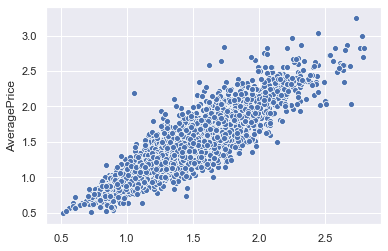

In [36]:
ypred = RandomForestRegressor().fit(X_train,y_train).predict(X_test)
sns.scatterplot(ypred, y_test)

In [37]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# hyperparameter tunning (to be finished)

Tunning for optimal RandomForest parameters. Best score is 0.866.

In [ ]:
#The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 66.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 123.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
best_grid_random = rf_random.best_estimator_
y_pred_1 = best_grid_random.predict(X_test)
r2_score(y_test, y_pred_1)

0.8679016274116143

Tunning for optimal Baggingregressor parameters with best score of 0.852.

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
max_features = [int(x) for x in np.linspace(start = .5, stop = 2, num = 4)]
max_samples = [int(x) for x in np.linspace(start = .5, stop = 2, num = 4)]
bootstrap = [True, False]
bootstrap_features = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
               'bootstrap': bootstrap,
               'bootstrap_features': bootstrap_features}

In [ ]:
bg = BaggingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
bg_random = RandomizedSearchCV(estimator = bg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
bg_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BaggingRegressor(base_estimator=None,
                                              bootstrap=True,
                                              bootstrap_features=False,
                                              max_features=1.0, max_samples=1.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'max_features': [0, 1, 1, 2],
                                        'max_samples': [0, 1, 1, 2],
                                        'n_estimator

In [ ]:
best_grid_random = bg_random.best_estimator_
y_pred_2 = best_grid_random.predict(X_test)
r2_score(y_test, y_pred_2)

0.06415338550265948

In [ ]:
dict_score = {}
list_score = []
for n_estimator in range(300,600,20):
  best_grid_random = BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=n_estimator,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False).fit(X_train,y_train)
  y_pred_2 = best_grid_random.predict(X_test)
  dict_score[n_estimator] = r2_score(y_test, y_pred_2)
  list_score.append(r2_score(y_test, y_pred_2))


In [ ]:
best_grid_random = BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=540,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False).fit(X_train,y_train)
y_pred_2 = best_grid_random.predict(X_test)
r2_score(y_test, y_pred_2)

0.8518827709029994

Tuning for best KNN regressor parameters. Best score is 0.748

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
leaf_size = [int(x) for x in np.linspace(start = 10, stop = 40, num = 10)]
p = [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]
weights = ['uniform','distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
random_grid = {'n_neighbors': n_neighbors,
               'leaf_size': leaf_size,
               'p': p,
               'weights': weights,
               'algorithm': algorithm}

In [ ]:
knn = KNeighborsRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
knn_random = RandomizedSearchCV(estimator = knn, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
knn_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 86.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 13, 16, 20, 23, 26,
                                                      30, 33, 36, 40],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15],
         

In [ ]:
best_grid_random = knn_random.best_estimator_
y_pred_3 = best_grid_random.predict(X_test)
r2_score(y_test, y_pred_3)

0.7477700158276028

Tuning for best Decision Tree regressor parameters. Best score is 0.746

In [ ]:
from sklearn.tree import DecisionTreeRegressor
criterion = ['mse', 'friedman_mse', 'mae']
splitter = ['best', 'random']
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 5, num = 3)]
max_features = ['auto', 'sqrt', 'log2']
random_grid = {'criterion': criterion,
               'splitter': splitter,
               'min_samples_split': min_samples_split,
               'max_features': max_features}

In [ ]:
dt = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dt_random.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [ ]:
best_grid_random = dt_random.best_estimator_
y_pred_4 = best_grid_random.predict(X_test)
r2_score(y_test, y_pred_4)

0.7419989896243173

In [ ]:
best_grid_random.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')>

Plotting results

In [ ]:
data_pred = pd.DataFrame({'Random Forest':y_pred_1, 'Bagging Regressor':y_pred_2, 'KNN':y_pred_3, 'Decission Tree':y_pred_4, 'y_test':y_test})

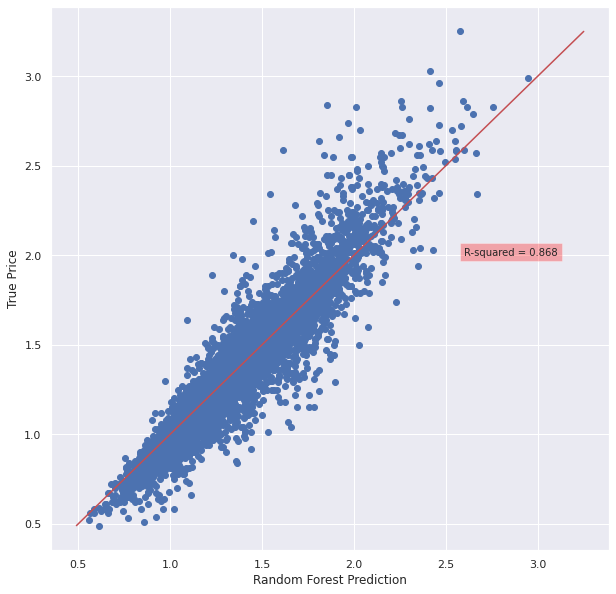

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x = 'Random Forest', y = 'y_test', data = data_pred)
plt.xlabel('Random Forest Prediction')
plt.ylabel('True Price')
plt.plot(np.unique(y_test), (np.unique(y_test)), 'r')
plt.text(2.6, 2, 'R-squared = %0.3f' % r2_score(y_test, y_pred_1), bbox=dict(facecolor='red', alpha=0.3))
plt.show()

In [ ]:
data_pred.index

RangeIndex(start=0, stop=4563, step=1)